(parametric equations)=
# Parametric Equations

```{index} Parametric Equations
```

:::{tip}
Below is the list of topics that are covered in this section:
- Parametric Equations - Curves and Tangents
- Parametric Equations - Area and Arc Length
- Polar Coordinates - Conversion and Tangents
- Polar Coordinates - Area and Arc Length
:::

In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import quad
import math



## Parametric Equations - Curves and Tangents

As we already discussed in Implicit Differentiation in the Derivative Section, many functions cannot be written exclusively as $y=f(x)$ or $x=h(y)$.

A simple example is the equation of a circle that is centered at the origin, $x^2+y^2=r^2$.
Trying to write this equation exclusively gives $y=\pm\sqrt{r^2-x^2}$ or $x=\pm\sqrt{r^2-y^2}$, but these contain two functions each. 

Besides circles, there are many common curves out there that cannot be written as a single equation in terms of $x$ or $y$ (can you think of some other examples?)

To make it easier to work with such curves, **parametric equations** are introduced.
The idea is to involve a third variable, called a **parameter**, usually (but not necessarily) denoted with $t$, such that $\boldsymbol{x=f(t)}$ and $\boldsymbol{y=g(t)}$.

#### Parametric Curves

**Parametric Curve** is the collection of points $(x,y)=\left(f(t), g(t)\right)$ obtained by letting $t$ be *all possible values*.

When *all possible values* of $t$ is not restricted, there is really no official *rule* on which values of $t$ need to be chosen.
Some simply try many different values of $t$ until they are *confident enough* that they have enough information to know what the shape of the curve should be.
Moreover, there are cases where many values of $t$ give the same point on the curve so the restriction can be quite natural. To describe this, let's use the circle equation as an example.

:::{admonition} Example

Show that the parametric equations $x=r\cos(t)$ and $y=r\sin(t)$ are equivalent to the circle equation $x^2+y^2=r^2$. Can $t$ be restricted?

To prove this, consider the unit following circle:
 
<img src="6PE1PC1.png" width="150px">

In the right triangle, we can see that $\sin(t)=\dfrac{y}{r}$ and $\cos(t)=\dfrac{x}{r}$.

Combine with the trigonometric identity $\sin^2(t)+\cos^2(t)=1 \quad \Rightarrow \quad \left(\dfrac{y}{r}\right)^2+\left(\dfrac{x}{r}\right)^2=1$.

Removing the parentheses we get $\dfrac{y^2}{r^2}+\dfrac{x^2}{r^2}=1$ and then multiplying both sides by $r^2$ we get $x^2+y^2=r^2$.

The arrows on the parametric curves indicate which way the curve goes as $t$ increases, and are called the **direction of motion**. While they are helpful to see the direction, the arrows are not always shown as they are not an actual part of the curve itself.

Here $t$ can be restricted to $0\leq t \leq 2\pi$, as taking value $t<0$ or $t>2\pi$ just overwrites parts of the same circle curve. Of course, this kind of restriction doesn't occur in general. 
:::

:::{admonition} Example
Sketch the parametric curve for the parametric equations $x=t+t^2$ and $y=1-2t$ on $-1\leq t\leq 1$.

We can start by picking certain values of $t$ on $[-1,1]$ and get some points $(t,x,y):\left(-1,0,3\right),\left(-0.5,-0.25,2\right),\left(0,0,1\right),\left(0.5,0.75,0\right),\left(1,2,-1\right)$.

Plotting the points with the direction of motion, and connecting the points give the parabola:

<img src="6PE1PC2.png" width="200px">

However, how does one know that connecting the points gave a parabola while we never check where the points are for the other $t$ values in $[-1,1]$?

Particularly in this case, we can confirm that the curve is a parabola by eliminating the parameter $t$ in the equations: 

\begin{align*}
y=1-2t &\Rightarrow t=1-\frac{y}{2}\\
x=t+t^2 &\Rightarrow x=\left(1-\frac{y}{2}\right)+\left(1-\frac{y}{2}\right)^2
\end{align*}

From here we can see that $x$ is a quadratic equation of $y$, confirming the shape of the curve. 
:::

However, the parameter cannot always be easily eliminated from the parametric equations like in the above example. Even when it can be eliminated, it does not always give an easily recognizable equation that can confirm the curve like in the above example. That is why there are cases where the problem solver must pick *enough* values of $t$ until they are *confident enough* to know what the shape of the curve is. Using a graphing tool, such as Python, makes this simpler. Below is the code to plot the curve of parametric equations $x(t)$ and $y(t)$ on $a\leq t \leq b$.

Enter the parametric equation x(t):  t+t**2
Enter the parametric equation y(t):  1-2*t
Enter the left endpoint of the interval (a):  -1
Enter the right endpoint of the interval (b):  1


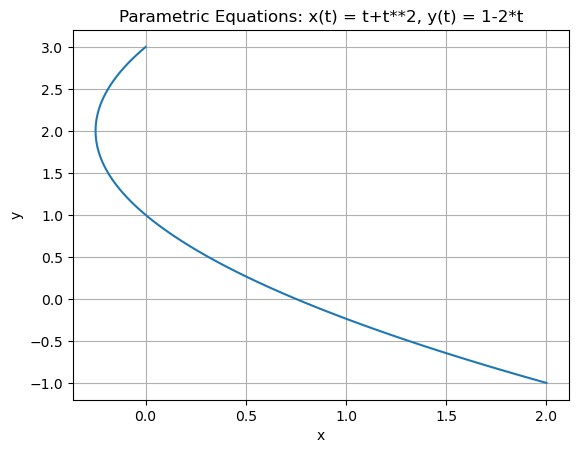

In [13]:
# Prompt the user for x(t), y(t), and the interval [a,b]
x_t = input("Enter the parametric equation x(t): ")
y_t = input("Enter the parametric equation y(t): ")
a = float(input("Enter the left endpoint of the interval (a): "))
b = float(input("Enter the right endpoint of the interval (b): "))

# Define the parameter t as a symbol
t = sp.symbols('t')

# Define the parametric equations
x_expr = sp.sympify(x_t)
y_expr = sp.sympify(y_t)

# Evaluate x(t) and y(t) for the given parameter range
t_vals = np.linspace(a, b, 100)
x_vals = [x_expr.subs(t, val) for val in t_vals]
y_vals = [y_expr.subs(t, val) for val in t_vals]

# Plot the parametric equations
plt.plot(x_vals, y_vals)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Parametric Equations: x(t) = {}, y(t) = {}'.format(x_t, y_t))
plt.grid(True)
plt.show()

#### Tangents with Parametric Equations

Recall in the Derivative section that for $y=f(x)$, we can find the tangent line at $x=a$ by using linearization
$y=L(x)=f(a)+f'(a)(x-a)$, where $f\,'(a)=\dfrac{dy}{dx}\,\Bigg\vert_{x=a}$ represents the slope of the tangent line.

Now we consider the tangent line of parametric equations given by $x(t)$ and $y(t)$.
Unlike for explicit function $y=f(x)$ where there can only be one tangent line at a point, it is possible to have more than one tangent line at a point on a parametric curve. 

**Derivative for Parametric Equations**

Consider $y=f(x)$. Applying Chain Rule, we have $\dfrac{dy}{dt}=f\,'(x)\dfrac{dx}{dt}=\dfrac{dy}{dx}\dfrac{dx}{dt}$ and hence $\boldsymbol{\dfrac{dy}{dx}=\dfrac{\frac{dy}{dt}}{\frac{dx}{dt}}}$, provided $\dfrac{dx}{dt}\neq 0$.

Similarly, for $x=f(y)$, we have $\boldsymbol{\dfrac{dx}{dy}=\dfrac{\frac{dx}{dt}}{\frac{d}{dt}}}$, provided $\dfrac{dy}{dt}\neq 0$.

This example shows that with parametric curves, it is possible to have multiple tangent lines at a point.


:::{admonition} Example

Find the tangent line(s) to the parametric curve given by $x=t^3-2t$ amd $y=t^2$ at the point $(0,2)$.

__Solution__ Slope of the tangent line is $m=\dfrac{dy}{dx}=\dfrac{\frac{dx}{dt}}{\frac{d}{dt}}=\dfrac{2t}{3t^2-2}$.
Convert the point $(x,y)=(0,2)$ in terms of $t$: $0 = t^3-2t$ gives $t=0$ or $t=\pm \sqrt{2}$ while $2 = t^2$ gives $t=\pm \sqrt{2}$.

The value $t$ that satisfy both are $t=\pm \sqrt{2}$, hence there are two tangent lines at the point $(x,y)=(0,2)$, each correspond to slope at $t=\pm \sqrt{2}$.

Find each slope $m$ and use the slope-intercept form $y=b+mx$ we have the equation of the tangent lines:
- $t=-\sqrt{2} \Rightarrow m=\dfrac{dy}{dx}\Bigg\vert_{t=-\sqrt{2}}=-\dfrac{2\sqrt{2}}{4}=-\dfrac{\sqrt{2}}{2} \Rightarrow \boldsymbol{y=2-\dfrac{\sqrt{2}}{2}x}$
- $t=\sqrt{2} \Rightarrow m=\dfrac{dy}{dx}\Bigg\vert_{t=\sqrt{2}}=\dfrac{2\sqrt{2}}{4}=\dfrac{\sqrt{2}}{2} \Rightarrow \boldsymbol{y=2+\dfrac{\sqrt{2}}{2}x}$

Graphically on the parametric curve:

<img src="6PE1PC3.png" width="500px">

:::

**Horizontal Tangents for Parametric Equations** occurs when $\dfrac{dy}{dt}=0$, provided $\dfrac{dx}{dt}\neq 0$.

**Vertical Tangents for Parametric Equations** occurs when $\dfrac{dx}{dt}=0$, provided $\dfrac{dy}{dt}\neq 0$.

:::{admonition} Example

Using the previous example $x(t)=t^3-2t$ and $y(t)=t^2$, find the $(x,y)$-coordinates of the points where the parametric curve has horizontal or vertical tangents.

First derivative of parametric equations: $x(t)=t^3-2t \Rightarrow \dfrac{dx}{dt}=3t^2-2$ and $y(t)=t^2 \Rightarrow \dfrac{dy}{dt}=2t$. 

- For Horizontal tangent:
    $\dfrac{dy}{dt}=2t \Rightarrow t=0$. Hence, there is one horizontal tangent, at $(0,0)$.
- For Vertical tangent:
    $\dfrac{dx}{dt}=3t^2-2 \Rightarrow t=\pm\sqrt{\dfrac{2}{3}}$. Hence, there are two vertical tangents, at $\left(\pm\dfrac{4\sqrt{6}}{9},\dfrac{2}{3}\right)$.
 
 :::
    
    
<img src="6PE1PC4.png" width="500px">



Using the code to find the $t$ values can be done by setting the derivative to zero as follows:

In [11]:
# Ask user for parametric equations x(t) and y(t)
x_t_str = input("Enter the parametric equation x(t): ")
y_t_str = input("Enter the parametric equation y(t): ")

# Define the symbols and the parametric equations
t = sp.symbols('t')
x_t = sp.sympify(x_t_str)
y_t = sp.sympify(y_t_str)

# Calculate the derivative of y(t) with respect to t
dy_dt = sp.diff(y_t, t)

# Find the values of t for horizontal tangents
horizontal_tangent_t = sp.solve(dy_dt, t)

# Find the values of t for vertical tangents
vertical_tangent_t = sp.solve(x_t.diff(t), t)

# Print the results
if horizontal_tangent_t:
    print("Horizontal Tangent at t = {}".format(horizontal_tangent_t))
else:
    print("No Horizontal Tangent")

if vertical_tangent_t:
    print("Vertical Tangent at t = {}".format(vertical_tangent_t))
else:
    print("No Vertical Tangent")

Enter the parametric equation x(t):  t**3-2*t
Enter the parametric equation y(t):  t**2


Horizontal Tangent at t = [0]
Vertical Tangent at t = [-sqrt(6)/3, sqrt(6)/3]


**Second Derivative for Parametric Equations**

From the first derivative, we can get the second derivative: 
$\dfrac{d^2y}{dx^2}= \dfrac{d}{dx}\left(\dfrac{dy}{dx}\right) = \dfrac{\frac{d}{dt}\left(\frac{dy}{dx}\right)}{\frac{dx}{dt}}$.

:::{admonition} Example
Using the previous example $x(t)=t^3-2t$ and $y(t)=t^2$, find $\dfrac{d^2y}{dx^2}$.

From first derivative:  $\dfrac{dx}{dt}=3t^2-2 \qquad \dfrac{dy}{dt}=2t \qquad \dfrac{dy}{dx}=\dfrac{2t}{3t^2-2}$.

Hence, $\dfrac{d}{dt}\left(\dfrac{dy}{dx}\right)=\dfrac{d}{dt}\left(\dfrac{2t}{3t^2-2}\right)=\dfrac{-4-6t^2}{\left(3t^2-2\right)^2}$.

Thus $\dfrac{d^2y}{dx^2}=\dfrac{\frac{d}{dt}\left(\frac{dy}{dx}\right)}{\frac{dx}{dt}}=\dfrac{\frac{-4-6t^2}{\left(3t^2-2\right)^2}}{3t^2-2}=\boldsymbol{\dfrac{-4-6t^2}{\left(3t^2-2\right)^3}}$.
:::

## Parametric Equations - Area and Arc Length

#### Area with Parametric Equations

Given the parametric equations $x(t)$ and $y(t)$.

If $x(t)$ is differentiable and the corresponding parametric curve is not self-intersecting on $a\leq t\leq b$, then the area under the parametric curve on the interval is given by $\boldsymbol{A=\displaystyle\int_a^b y(t)\cdot x\,'(t)\,dt}$.

:::{admonition} Example
Find the area under the parametric curve given by $x(t)=t-\sin(t)$ and $y(t)=1-\cos(t)$ on $0\leq t \leq 2\pi$.

It is left to the reader to check that the parametric curve is not self-intersecting (plot the curve!)

Directly using the arc formula we have $A=\displaystyle\int_a^b y(t)\cdot x\,'(t)\,dt=A=\displaystyle\int_0^{2\pi} (1-\cos(t))(1-\cos(t))\,dt=\boldsymbol{3\pi}$.
:::

The code below ask user for $x(t),y(t),a,b$, and return the area. 

In [45]:
# Ask the user for the parametric equations x(t) and y(t)
x_t = sp.sympify(input("Enter the parametric equation x(t): "))
y_t = sp.sympify(input("Enter the parametric equation y(t): "))

# Ask the user for the interval (a, b)
a_input = input("Enter the lower limit (a): ")
b_input = input("Enter the upper limit (b): ")

# Create the symbols for t
t = sp.symbols('t')

# Evaluate the inputs as symbolic expressions
a = sp.sympify(a_input)
b = sp.sympify(b_input)

# Calculate x'(t)
dx_dt = sp.diff(x_t, t)

# Calculate the integral of y(t)*x'(t) from t=a to t=b
integral = sp.integrate(y_t * dx_dt, (t, a, b))

# Print the result
print("The area under the curve from t={} to t={} is: {}".format(a, b, integral))

Enter the parametric equation x(t):  t-sin(t)
Enter the parametric equation y(t):  1-cos(t)
Enter the lower limit (a):  0
Enter the upper limit (b):  2*pi


The area under the curve from t=0 to t=2*pi is: 3*pi


#### Arc Length with Parametric Equations

Given the parametric equations $x(t)$ and $y(t)$ on $a\leq t \leq b$,
if $x(t)$ and $y(t)$ are differentiable, and the parametric curve is not self-overlapping, then the arc length of this curve is given by $\boldsymbol{L=\displaystyle\int_a^b \sqrt{\left(\dfrac{dx}{dt}\right)^2+\left(\dfrac{dy}{dt}\right)^2} \,dt}$.

:::{admonition} Example
Find the area under the parametric curve given by $x(t)=t-\sin(t)$ and $y(t)=1-\cos(t)$ on $0\leq t \leq 2\pi$.

It is left to the reader to check that the parametric curve is not self-overlapping (plot the curve and try to alter the interval!)

Directly using the are formula we have $L=\displaystyle\int_a^b \sqrt{\left(\dfrac{dx}{dt}\right)^2+\left(\dfrac{dy}{dt}\right)^2} \,dt=\displaystyle\int_0^{2\pi} \sqrt{\left(1-\cos(t)\right)^2+\left(\sin(t)\right)^2} \,dt=\boldsymbol{8}$.
:::

The code below ask user for $x(t),y(t),a,b$, and return the arc length.

In [25]:
# Ask the user for parametric equations x(t) and y(t)
x_expr = sp.sympify(input("Enter the parametric equation x(t): "))
y_expr = sp.sympify(input("Enter the parametric equation y(t): "))

# Ask the user for the interval (a, b)
a_input = input("Enter the lower limit (a): ")
b_input = input("Enter the upper limit (b): ")

# Create the symbols for t
t = sp.symbols('t')

# Evaluate the inputs as symbolic expressions
a = sp.sympify(a_input)
b = sp.sympify(b_input)

# Define the x(t) and y(t) functions
x_t = sp.lambdify(t, x_expr)
y_t = sp.lambdify(t, y_expr)

# Define the derivative functions dx/dt and dy/dt
dx_dt = sp.diff(x_expr, t)
dy_dt = sp.diff(y_expr, t)

# Define the integrand for arc length calculation
integrand = sp.sqrt(dx_dt**2 + dy_dt**2)

# Define the function to be integrated
f = sp.lambdify(t, integrand)

# Calculate the arc length using numerical integration
arc_length, _ = quad(f, a, b)

# Print the result
print("Arc length of the parametric curve on the interval ({}, {}): {}".format(a, b, arc_length))

Enter the parametric equation x(t):  t-sin(t)
Enter the parametric equation y(t):  1-cos(t)
Enter the lower limit (a):  0
Enter the upper limit (b):  2*pi


Arc length of the parametric curve on the interval (0, 2*pi): 8.0


**Example where curve self-overlapping**

Now suppose the problem is finding the arc length for $x(t)=\sin(3t)$ and $y(t)=\cos(3t)$ for $0\leq t \leq 2\pi$.

Recall that $x(t)=\sin(t)$ and $y(t)=\cos(t)$ for $0\leq t \leq 2\pi$ gives the unit circle.

Hence $x(t)=\sin(3t)$ and $y(t)=\cos(3t)$ for $0\leq t \leq 2\pi$ is the unit circle repeated 3 times (check this!)

Thus for the arc length, if we want to use the formula for $L$, then we must change the $b$ from $2\pi$ into $\frac{2\pi}{3}$ to get the circumference of the unit circle:

$L=\displaystyle\int_0^{\frac{2\pi}{3}} \sqrt{\left(3\cos(3t)\right)^2+\left(-3\sin(3t)\right)^2} \,dt=\boldsymbol{2\pi}$.

## Polar Coordinates - Conversion and Tangents

```{index} Polar Coordinates
```

In the **Cartesian** coordinate system, a point $P$ is given by the coordinate $(x,y)$ when it is moving $x$ units horizontally and $y$ units vertically from the origin $(0,0)$.

In the **Polar** coordinate system, a point is given by the coordinate $(r,\theta)$ when it is distanced $r$ straight from the origin $(0,0)$, creating a $\theta$ angle.

The $r$ in polar coordinates is called the **radial coordinate** or **radian distance** or **radius**. Since it is a distance, $\boldsymbol{r}$ **is nonnegative**.

The $\theta$ in polar coordinate is called the **angular coordinate** or **polar angle** or **azimuth**.

<img src="6PE3PC1.png" width="280px">

#### Polar to Cartesian Coordinates Conversion

From the diagram above, it is easy to see that $\boldsymbol{x=r\cos(\theta)}$ and $\boldsymbol{y=r\sin(\theta)}$.

:::{admonition} Example
Convert $(r,\theta)=\left(4,\dfrac{\pi}{3}\right)$ into Cartesian coordinates.
- $x=r\cos(\theta)=4\cos\left(\dfrac{\pi}{3}\right)=4\cdot \dfrac{1}{2}=2$.
- $y=r\sin(\theta)=4\sin\left(\dfrac{\pi}{3}\right)=4\cdot \dfrac{\sqrt{3}}{2}=2\sqrt{3}$.

Hence the Cartesian coordinates of $(r,\theta)=\left(4,\dfrac{\pi}{3}\right)$ is $\boldsymbol{(x,y)=\left(2,2\sqrt{3}\right)}$.
:::

Below is the code that converts given Polar coordinates into Cartesian coordinates. To lower the risk of a typo involving $\pi$ in the polar angle $\theta$, the code is set to ask the user for $\theta$ to be written in degrees, and it will convert it into radians. Recall that $\pi$ radians is $180^\circ$.

In [27]:
# Ask the user for polar coordinates (r, theta)
r = float(input("Enter the r-coordinate: "))
theta = float(input("Enter the theta-coordinate in degrees: "))

# Convert theta to radians
theta_radians = math.radians(theta)

# Calculate the Cartesian coordinates
x = r * math.cos(theta_radians)
y = r * math.sin(theta_radians)

# Print the Cartesian coordinates
print("Cartesian coordinates (x, y): ({}, {})".format(x, y))

Enter the r-coordinate:  4
Enter the theta-coordinate in degrees:  60


Cartesian coordinates (x, y): (2.0000000000000004, 3.4641016151377544)


#### Cartesian to Polar Coordinates Conversion

Again from the diagram above, by the Pythagorean theorem, $r^2=x^2+y^2$. Since $r$ is nonnegative, we have $\boldsymbol{r=\sqrt{x^2+y^2}}$.

Also, since $\tan(\theta)=\dfrac{y}{x}$, we have $\boldsymbol{\theta=\arctan\left(\dfrac{y}{x}\right)}$.
However, it is important to **pay attention to the quadrant** in which the coordinate is located. 

:::{admonition} Example
Convert $(x,y)=(-8,1)$ into Polar coordinates.

- $r=\sqrt{x^2+y^2}=\sqrt{(-8)^2+1^2}=\sqrt{65}\approx 8.0623$.
- $\theta=\arctan\left(\dfrac{1}{-8}\right)\approx -0.1244$.
  - However, note that the point $(x,y)=(-8,1)$ is on the second quadrant, while $-\frac{\pi}{2}<-0.1244<0$ means the angle $-0.1244$ is on the fourth quadrant.
  - To get the correct angle on the second quadrant, $\theta\approx -0.1244+\pi\approx 3.0172$.
    
Hence, the Polar coordinate of $(x,y)=(-8,1)$ is $\boldsymbol{(r,\theta)=(8.0623,3.0172)}$.
:::

<img src="6PE3PC2.png" width="350px">

Below is the code that converts given Cartesian coordinates into Polar coordinates.
Since we need to pay attention to the quadrant, it is important to set the code using **math.atan2** instead of **math.atan**, as **atan** only return angle in $\left(-\frac{\pi}{2},\frac{\pi}{2}\right)$.

In [28]:
# Ask the user for Cartesian coordinates (x, y)
x = float(input("Enter the x-coordinate: "))
y = float(input("Enter the y-coordinate: "))

# Calculate the polar coordinates
r = math.sqrt(x**2 + y**2)
theta = math.atan2(y, x)

# Convert theta to degrees if desired
# theta_degrees = math.degrees(theta)

# Print the polar coordinates
print("Polar coordinates (r, theta): ({}, {})".format(r, theta))

Enter the x-coordinate:  -8
Enter the y-coordinate:  1


Polar coordinates (r, theta): (8.06225774829855, 3.017237659043032)


#### Equations Conversion

Using the same conversions, we can convert equations between Polar and Cartesian coordinate systems.

:::{admonition} Example
- Convert $x^2=4xy-y^2+2$ into Polar coordinates
 
    \begin{align*}
    x^2 &= 4xy-y^2+2 \\
    \left(r\cos(\theta)\right)^2 &= 4(r\cos(\theta))(r\sin(\theta))-\left(r\sin(\theta)\right)^2+2\\
    r^2\left(\cos^2(\theta)+\sin^2(\theta)\right) &= 4r^2\cos(\theta)\sin(\theta)\\
    r^2 &= 2r^2\sin(2\theta)\\
    \boldsymbol{0} &= \boldsymbol{ r^2\left(2\sin(2\theta)-1\right)+2}
    \end{align*}

    There is no rule on how far one should "simplify" their equations.
    It should be okay to leave it as $\left(r\cos(\theta)\right)^2 = 4(r\cos(\theta))(r\sin(\theta))-\left(r\sin(\theta)\right)^2+2$.
    For further purposes, many resources prefer to simplify until the $r=f(\theta)$ form whenever possible.
    
- Convert $\dfrac{2}{r}=\sin(\theta)-\sec(\theta)$

    \begin{align*}
    \dfrac{2}{r} &=\sin(\theta)-\sec(\theta)\\
    2 &=r\sin(\theta) - \dfrac{r}{\cos(\theta)} \\
    2 &=r\sin(\theta) - \dfrac{r^2}{r\cos(\theta)} \\
    \boldsymbol{2} & \boldsymbol{= y - \dfrac{x^2+y^2}{x}}
    \end{align*}

    One can also simplify further to $2x=y-x^2-y^2$.
 :::

#### Tangents with Polar Coordinates

Given the equation in the polar form of $r=f(\theta)$. By applying Cartesian-Polar conversion and Product Rule, we have:

- $x=r\cos(\theta)=f(\theta)\cos(\theta) \Rightarrow \dfrac{dx}{d\theta}=f\,'(\theta)\cos(\theta)-f(\theta)\sin(\theta)=\dfrac{dr}{d\theta}\cos(\theta)-r\sin(\theta)$.

- $y=r\sin(\theta)=f(\theta)\sin(\theta) \Rightarrow \dfrac{dx}{d\theta}=f\,'(\theta)\sin(\theta)+f(\theta)\cos(\theta)=\dfrac{dr}{d\theta}\sin(\theta)+r\cos(\theta)$.

Hence, the slope of the tangent line is $\boldsymbol{m=\dfrac{dy}{dx}=\dfrac{\frac{dr}{d\theta}\sin(\theta)+r\cos(\theta)}{\frac{dr}{d\theta}\cos(\theta)-r\sin(\theta)}}$.

The equation of the tangent line can then be obtained using the point-slope form $y-y_1=m(x-x_1)$.

:::{admonition} Example
Determine the equation of the tangent line to $r=1+4\sin(\theta)$ at $\theta=\dfrac{\pi}{6}$.

Now $\dfrac{dr}{d\theta}=4\cos(\theta)$, so $\dfrac{dy}{dx}=\dfrac{\left(4\cos(\theta)\right)\sin(\theta)+\left(1+4\sin(\theta)\right)\cos(\theta)}{\left(4\cos(\theta)\right)\cos(\theta)-\left(1+4\sin(\theta)\right)\sin(\theta)}$.

The slope of the tangent line is $m=\dfrac{dy}{dx}\,\Bigg\vert_{\theta=\frac{\pi}{6}}=\dfrac{4\cdot\frac{\sqrt{3}}{2}\cdot\frac{1}{2}+ \left(1+4 \cdot \frac{1}{2}\right) \cdot\frac{\sqrt{3}}{2}}{4\cdot\frac{\sqrt{3}}{2}\cdot\frac{\sqrt{3}}{2}-\left(1+4\cdot \frac{1}{2}\right)\cdot\frac{1}{2}}=\dfrac{5\sqrt{3}}{3}$.

To use the point slope form, we have $x_1=r\left(\dfrac{\pi}{6}\right)\cos\left(\dfrac{\pi}{6}\right)=\dfrac{3\sqrt{3}}{2}$ and 
$y_1=r\left(\dfrac{\pi}{6}\right)\sin\left(\dfrac{\pi}{6}\right)=\dfrac{3}{2}$.

Hence the equation of the tangent line in point-slope form is $\boldsymbol{y-\dfrac{3}{2}=\dfrac{5\sqrt{3}}{3}\left(x-\dfrac{3\sqrt{3}}{2}\right)}$, or,
in slope-intercept form is  $\boldsymbol{y=\dfrac{5\sqrt{3}}{3}x-6}$.
:::

<img src="6PE3PC3.png" width="400px">

Below is a code that asks for the polar equation $r(t)$ and the point $t=c$. It returns the equation of the tangent line to $r(t)$ at $t=c$.

In this instance, $t$ is used instead of $\theta$ only for naming convenience, as it is not to be confused with the use of $t$ in the parametric equation.

In [31]:

# Ask user for polar equation
r = sp.sympify(input("Enter the polar equation r(t): "))

# Ask user for the value of t
c = sp.sympify(input("Enter the value of t: "))

# Convert polar coordinates to Cartesian coordinates
x = r * sp.cos(sp.Symbol('t'))
y = r * sp.sin(sp.Symbol('t'))

# Differentiate Cartesian coordinates with respect to t
dx_dt = sp.diff(x, sp.Symbol('t'))
dy_dt = sp.diff(y, sp.Symbol('t'))

# Calculate dy/dx
slope = dy_dt / dx_dt

# Calculate the y-intercept of the tangent line
y_intercept = y.subs(sp.Symbol('t'), c) - slope.subs(sp.Symbol('t'), c) * x.subs(sp.Symbol('t'), c)

# Get slope and y-intercept as numerical values
slope_val = slope.subs(sp.Symbol('t'), c)
y_intercept_val = y_intercept.evalf()

# Format the equation of the tangent line
tangent_line_eq_formatted = f"y = {slope_val}*x + {y_intercept_val}"

# Print the equation of the tangent line
print("Equation of the tangent line at t = {}: {}".format(c, tangent_line_eq_formatted))

Enter the polar equation r(t):  1+4*sin(t)
Enter the value of t:  pi/6


Equation of the tangent line at t = pi/6: y = 5*sqrt(3)/3*x + -6.00000000000000


## Polar Coordinates - Area and Arc Length

#### Area with Polar Coordinates

Area with polar coordinates normally refers to the area formed between two polar angles $\theta=\alpha$ and $\theta=\beta$ and some radius(es).

<img src="6PE4PC1.png" width="300px">

The area is given by $\boldsymbol{A=\displaystyle\int_{\alpha}^{\beta} \dfrac{1}{2}\left(r_o^2-r_i^2\right)\,d\theta}$.
Here $r_o(\theta)$ and $r_i(\theta)$ is the radius equation that lies on the outside and inside between $\theta=\alpha$ and $\theta=\beta$, respectively.

If there is only one radius equation, then the formula is easily altered by setting $r_i(\theta)=0$.

**Example**

Find the area inside the inner loop of $r=1+4\sin(\theta)$.

<img src="6PE4PC2.png" width="450px">

Since it is a loop, then $r_o=r=1+4\sin(\theta)$ and $r_i=0$. Since the inner loop goes through the origin, we can find $\theta$ by solving $r=0$.

Setting $1+4\sin(\theta)=0$ gives $\theta = \arcsin\left(-\frac{1}{4}\right)\approx -0.2527$ and angle in the fourth quadrant. To trace the inner loop, trace $\theta$ from the third to fourth quadrant.

Hence $\alpha=-\pi+0.2527$ and $\beta=-0.2527$. The area of the inner loop is then 
$A=\displaystyle\int_{-\pi+0.2527}^{-0.2527} \dfrac{1}{2}\left(r=1+4\sin(\theta)\right)^2\,d\theta\approx \boldsymbol{6.39124}$.

**Example**

Find the area inside $r=6+2\cos(\theta)$ but outside $r=4-2\cos(\theta)$.

<img src="6PE4PC3.png" width="500px">

To find $\theta$, find where the loop intersects: 
$6+2\cos(\theta)=4-2\cos(\theta) \Rightarrow \cos(\theta)=-\frac{1}{2} \Rightarrow \theta=\arccos\left(\frac{1}{2}\right)=\frac{2\pi}{3}$.

To trace the area counterclockwise, we trace $\theta$ from the third to second quadrant hence we have $\alpha=-\frac{2\pi}{3}$ and $\beta=\frac{2\pi}{3}$.

The area is then $A=\displaystyle\int_{-\frac{2\pi}{3}}^{\frac{2\pi}{3}}\dfrac{1}{2} \left[\left(6+2\cos(\theta)\right)^2-\left(4-2\cos(\theta)\right)^2\right]\,d\theta \approx \boldsymbol{76.5289}$.

#### Arc Length with Polar Coordinates

For then non-overlapping curve of a polar equation $r=f(\theta)$ from $\theta=\alpha$ to $\theta=\beta$, the arc length is given by 
$\boldsymbol{L=\displaystyle\int_{\alpha}^{\beta} \sqrt{r^2+\left(\dfrac{dr}{d\theta}\right)^2}\,d\theta}$.

:::{admonition} Example
Determine the arc length of $r=2\sin(\theta)$ for $0\leq \theta \leq \pi$.

First, check that the curve is not self-overlapping on the given range of $\theta$. One can plot to check that the curve is a nonoverlapping circle.

Hence, the arc length is 

\begin{align*}
L= &\displaystyle\int_{\alpha}^{\beta} \sqrt{r^2+\left(\dfrac{dr}{d\theta}\right)^2}\,d\theta \\
= &\displaystyle\int_{0}^{\pi} \sqrt{(2\sin(\theta))^2+\left(2\cos(\theta)\right)^2}\,d\theta \\
= &\displaystyle\int_{0}^{\pi} \sqrt{4\left(\sin^2(\theta)+\cos^2(\theta)\right)}\,d\theta \\
= &\displaystyle\int_{0}^{\pi} \sqrt{4}\,d\theta = \displaystyle\int_{0}^{\pi} 2\,d\theta = \boldsymbol{2\pi}\\
\end{align*}
:::


Below is the code that returns the arc length given polar equation $r(t)$ and $\alpha\leq t\leq \beta$.
Note that the use of $t$ instead of $\theta$ in the code below is only for naming convenience, not to be confused with a parametric equation.

In [51]:
def arc_length_polar_equation():
    # Ask user for the polar equation
    equation = input("Enter the polar equation r(t): ")
    t = sp.symbols('t')

    # Define the polar equation
    r_t = sp.sympify(equation)

    # Ask user for the values of alpha and beta
    alpha = sp.sympify(input("Enter the value of alpha: "))
    beta = sp.sympify(input("Enter the value of beta: "))

    # Compute the arc length
    arc_length = sp.integrate(sp.sqrt(r_t**2 + (r_t.diff(t))**2), (t, alpha, beta))

    return arc_length

# Call the function and print the result
result = arc_length_polar_equation()
#result = round(arc_length_polar_equation(),3) -------> change above row into this if want to get numerical rounding to 3 decimals
print("Arc length:", result)

Enter the polar equation r(t):  2*sin(t)
Enter the value of alpha:  0
Enter the value of beta:  pi


Arc length: 2*pi


## Exercises

:::{admonition} Exercises

1. (Section 6.1) Show that for a circle centered at $(h,k)\neq (0,0),$ the parametric equation is $x=h+r\cos(t)$ and $y=k+r\sin(t).$

2. (Section 6.1) Sketch the following parametric equations. What shape is the curve?

    If the code fails to recognize $\pi$, you can approximate using $3.14$.

    - $x=\cos(t)$ and $y=\sin(t)$ for $0\leq t \leq 2\pi$. 
    
    - $x=2e^t$ and $y=cos\left(1+e^{2t}\right)$ for $0\leq t\leq \dfrac{2}{3}$ 
    
    - $x=\sin\left(e^{\cos(t)}-2\cos(4t)-\sin^5\left(\dfrac{t}{12}\right)\right)$ and $y=\cos\left(e^{\cos(t)}-2\cos(4t)-\sin^5\left(\dfrac{t}{12}\right)\right)$ for $0\leq t \leq 20$.
    
 3. (Section 6.1) Given the parametric equations $x(t)=t^2-2t-11$ and $y(t)=-2t^4+12t^3-64t+7$.

    - Find the tangent line(s) at the point $(-3,7)$.
    - Find the $(x,y)$-coordinates of the horizontal and vertical tangents.
    - Find $\dfrac{d^2y}{dx^2}$.
    
    
 4. (Section 6.2) Given the parametric equations $x(t)=3-\cos^3(t)$ and $y(t)=4+\sin(t)$. 

    - Find the area below the parametric curve on $0\leq t \leq \pi$.
    - Find the arc length of the parametric curve on $0\leq t \leq 4\pi$.
    
    
 5. (Section 6.3) Do the following problems:
    
    - Convert the point $(r,\theta)=\left(-2,\dfrac{2\pi}{3}\right)$ to Cartesian coordinates.
    
    - Convert the point $(x,y)=(-2\sqrt{3},-6)$ to Polar coordinates.
    
    - Convert the equation $6r^3\sin(\theta)+\cos(\theta)=4$ to Cartesian coordinates.
    
    - Convert the equation $6-xy=\dfrac{2x}{5x^2+5y^2}$ to Polar coordinates.
    
    
 6. (Section 6.3) Determine the equation of the tangent line to $r=\cos(\theta)\sin(4\theta)$ at $\theta=\dfrac{\pi}{6}$. 
 
 7. (Section 6.4) Find the area that is inside both $r=2+\sin(\theta)$ and $r=1-\sin(\theta)$.  
    Hint: Wanted area $=$ Area1 $-$ Area2. Figure out what Area1 and Area2 are, and calculate each using the Area formula.
    
 8. (Section 6.4) Determine the arc length of the curve for each given polar equation on each given $\theta$ range.

    - $r=\theta$ for $0\leq \theta \leq 2\pi$
    - $r=\cos(\theta)+\sin(3\theta)$ for $0\leq \theta \leq \dfrac{2\pi}{3}$
 :::